In [1]:
from mis import Mis
import numpy as np
import files

In [2]:
# Instancio la clase Mis

mis = Mis()

In [8]:
# Opcion 1: Crear una matriz de incidencia aleatoria, NO RECOMENDADO PARA GRANDES GRAFOS

cantidad_vertices = 70

matrix = mis.random_incidence_matrix(cantidad_vertices)

print(matrix)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 0]]


In [3]:
# Opcion 2: Crear una matriz de incidencia propia y setearla

my_matrix = np.array(
    [[0, 1, 0, 0], 
    [1, 0, 1, 1],
    [0, 1, 0, 1], 
    [0, 1, 1, 0]]
)

a = np.ones((4, 4), dtype=np.int)

print(a - my_matrix)

c = a - my_matrix

mis.set_incidence_matrix(c)

[[1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]
 [1 0 0 1]]


In [3]:
# Opcion 3: Crear una lista de conexiones y setearla

my_edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (4, 5), (5, 2)]

mis.set_edge_list(my_edge_list)

In [8]:
# Opcion 4: Crear una matriz de incidencia aleatoria con un porcentaje de conexion entre nodos.
# Opcion ideal para grafos con gran cantidad de nodos

porcentaje = 0.10
cant_vertices = 10

matrix = mis.random_matrix_with_porc(cant_vertices, porcentaje)

print(matrix)

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


{0: [1],
 1: [0, 9, 2],
 2: [1, 6],
 4: [6],
 5: [8, 9],
 6: [2, 4],
 8: [5],
 9: [1, 5]}



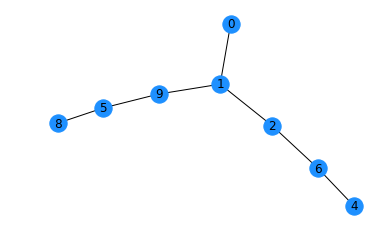

In [9]:
# Graficar el grafo

mis.graph.show_graph()
print()

mis.plot_graph(whit_mis=False)

Evaluating subsets...

Execution time 0.1336914999999408 seconds, or 0.0022281916666656797 minutes

Maximum independent set = {0, 2, 4, 8, 9}



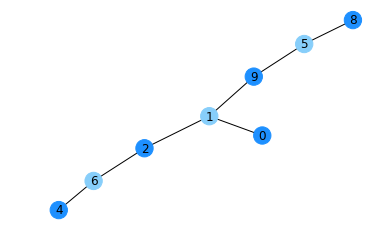

In [10]:
# Graficar el grafo con mis

mis_result, time = mis.maximum_independent_set2(verbose=False)

print('\nExecution time {} seconds, or {} minutes'.format(time, (time/60)))

print('\nMaximum independent set = {}\n'.format(mis_result))

mis.plot_graph(whit_mis=True)

In [11]:
# Probar el algoritmo para distintos tamanios de N

files.reset_result()

for n in range(5, 25):

    porcentaje = 0.10

    matrix = mis.random_matrix_with_porc(n, porcentaje)

    _, time = mis.maximum_independent_set2(verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result(result)

Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...
Evaluating subsets...


In [13]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)
    #plt.scatter(nodes, times)

    plt.xlabel('Cantidad de nodos')
    plt.ylabel('Ejecucion en minutos')

    plt.suptitle('Crecimiento del costo temporal')

    plt.savefig('mis.png', dpi=600)
    
    plt.show()

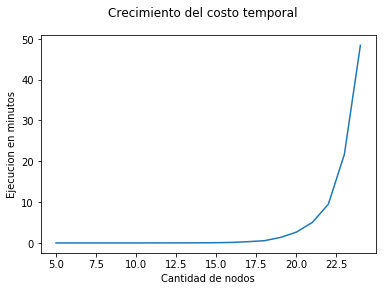

In [14]:
# Leo los resultados y los grafico

results = files.read_result()

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)